# 11. GEOSPATIAL ANALYSIS

# 11.1. Your First Map

# 11.1.1. COURS

In [6]:
# Chemin des sources
import os
os.chdir('C:/Users/PC Maison/4-KAGGLE/KAGGLE_DEV/KAGGLE_COURS_11-GEOSPATIAL_ANALYSIS')

In [50]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [15]:
# Read in the data
full_data = gpd.read_file("geospatial-learn-course-data/input/DEClands.shp")

# View the first five rows of the data
full_data.head()

,OBJECTID,CATEGORY,UNIT,FACILITY,CLASS,UMP,DESCRIPTIO,REGION,COUNTY,URL,SOURCE,UPDATE_,OFFICE,ACRES,LANDS_UID,GREENCERT,UMPURL,SHAPE_AREA,SHAPE_LEN,geometry
0,2743,FOREST PRESERVE,AFP,FULTON CHAIN WILD FOREST,WILD FOREST,FULTON CHAIN,None,6,HERKIMER,https://www.dec.ny.gov/lands/75305.html,DECRP,3/11,HERKIMER,739.361639,4239,N,http://www.dec.ny.gov/lands/51309.html,2.992090e+06,14445.172046,"POLYGON ((502476.666 4842386.993, 502476.739 4..."
1,2744,FOREST PRESERVE,AFP,FULTON CHAIN WILD FOREST,WILD FOREST,FULTON CHAIN,None,6,HERKIMER,https://www.dec.ny.gov/lands/75305.html,DECRP,11/08,HERKIMER,7.538903,3841,N,http://www.dec.ny.gov/lands/51309.html,3.050886e+04,870.836410,"POLYGON ((502090.747 4840324.577, 502110.011 4..."
2,2745,FOREST PRESERVE,AFP,INDEPENDENCE RIVER WILD FOREST,WILD FOREST,INDEPENDENCE RIVER,None,6,LEWIS,https://www.dec.ny.gov/lands/58192.html,DECRP,8/19,LOWVILLE,76519.233602,4253,N,https://www.dec.ny.gov/lands/22574.html,3.096624e+08,270633.583850,"POLYGON ((508503.626 4864992.965, 509092.576 4..."
3,2746,FOREST PRESERVE,AFP,INDEPENDENCE RIVER WILD FOREST,WILD FOREST,INDEPENDENCE RIVER,None,6,LEWIS,https://www.dec.ny.gov/lands/58192.html,DECRP,3/11,LOWVILLE,223.803334,4252,N,https://www.dec.ny.gov/lands/22574.html,9.057000e+05,5609.447134,"POLYGON ((490114.810 4859403.501, 490142.561 4..."
4,2747,FOREST PRESERVE,AFP,INDEPENDENCE RIVER WILD FOREST,WILD FOREST,INDEPENDENCE RIVER,None,6,LEWIS,https://www.dec.ny.gov/lands/58192.html,DECRP,3/11,LOWVILLE,114.466837,4019,N,https://www.dec.ny.gov/lands/22574.html,4.632309e+05,2723.724659,"POLYGON ((481679.514 4853407.042, 481072.554 4..."


In [16]:
type(full_data)

geopandas.geodataframe.GeoDataFrame

In [18]:
data = full_data.loc[:, ["CLASS", "COUNTY", "geometry"]].copy()
data

,CLASS,COUNTY,geometry
0,WILD FOREST,HERKIMER,"POLYGON ((502476.666 4842386.993, 502476.739 4..."
1,WILD FOREST,HERKIMER,"POLYGON ((502090.747 4840324.577, 502110.011 4..."
2,WILD FOREST,LEWIS,"POLYGON ((508503.626 4864992.965, 509092.576 4..."
3,WILD FOREST,LEWIS,"POLYGON ((490114.810 4859403.501, 490142.561 4..."
4,WILD FOREST,LEWIS,"POLYGON ((481679.514 4853407.042, 481072.554 4..."
...,...,...,...
2999,None,ALBANY,"POLYGON ((592614.788 4730677.364, 592772.235 4..."
3000,WILD FOREST,SARATOGA,"POLYGON ((585765.509 4786488.841, 585761.900 4..."
3001,None,LEWIS,"POLYGON ((470480.308 4836221.838, 470503.974 4..."
3002,None,LEWIS,"POLYGON ((456340.400 4813453.700, 455695.800 4..."


In [19]:
# How many lands of each type are there?
data.CLASS.value_counts()

WILD FOREST                   963
INTENSIVE USE                 107
PRIMITIVE                      63
WILDERNESS                     52
UNCLASSIFIED                   13
HISTORIC                        5
PRIMITIVE BICYCLE CORRIDOR      4
CANOE AREA                      1
Name: CLASS, dtype: int64

In [20]:
# Select lands that fall under the "WILD FOREST" or "WILDERNESS" category
wild_lands = data.loc[data.CLASS.isin(['WILD FOREST', 'WILDERNESS'])].copy()
wild_lands.head()

,CLASS,COUNTY,geometry
0,WILD FOREST,HERKIMER,"POLYGON ((502476.666 4842386.993, 502476.739 4..."
1,WILD FOREST,HERKIMER,"POLYGON ((502090.747 4840324.577, 502110.011 4..."
2,WILD FOREST,LEWIS,"POLYGON ((508503.626 4864992.965, 509092.576 4..."
3,WILD FOREST,LEWIS,"POLYGON ((490114.810 4859403.501, 490142.561 4..."
4,WILD FOREST,LEWIS,"POLYGON ((481679.514 4853407.042, 481072.554 4..."


# Create your first map!

<AxesSubplot:>

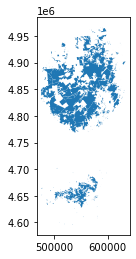

In [22]:
wild_lands.plot()

In [23]:
# View the first five entries in the "geometry" column
wild_lands.geometry.head()

0    POLYGON ((502476.666 4842386.993, 502476.739 4...
1    POLYGON ((502090.747 4840324.577, 502110.011 4...
2    POLYGON ((508503.626 4864992.965, 509092.576 4...
3    POLYGON ((490114.810 4859403.501, 490142.561 4...
4    POLYGON ((481679.514 4853407.042, 481072.554 4...
Name: geometry, dtype: geometry

In [45]:
# Campsites in New York state (Point)
POI_data = gpd.read_file("geospatial-learn-course-data/input/DECptsofinterest.shp")
campsites = POI_data.loc[POI_data.ASSET=='PRIMITIVE CAMPSITE'].copy()
campsites

,OBJECTID,UNIT,FACILITY,NAME,ASSET,DESCRIP,REGION,OFFICE,UPDATED,ASSET_UID,ACCESSIBLE,geometry
4,69614,STEUBEN 08,BIRDSEYE HOLLOW STATE FOREST,SANFORD LAKE CAMPSITE,PRIMITIVE CAMPSITE,#5,8,BATH,2015-01-09,11116,N,POINT (320529.887 4688605.092)
7,6606,AFP,SARANAC LAKES WILD FOREST,UPPER SARANAC LAKE SITE 1,PRIMITIVE CAMPSITE,None,5,RAY BROOK,None,13559,N,POINT (553716.745 4908501.936)
8,81773,AFP,INDEPENDENCE RIVER WILD FOREST,CAMPSITE 32,PRIMITIVE CAMPSITE,None,6,LOWVILLE,2016-03-01,15614,N,POINT (502472.208 4861318.432)
9,74430,AFP,ESSEX CHAIN LAKES PRIMITIVE AREA,WATERFRONT PRIMITIVE TENTSITE,PRIMITIVE CAMPSITE,None,5,WARRENSBURG,2015-09-17,3637,N,POINT (560576.819 4858860.747)
12,81776,AFP,INDEPENDENCE RIVER WILD FOREST,CAMPSITE 36,PRIMITIVE CAMPSITE,None,6,LOWVILLE,2016-03-01,15611,N,POINT (500087.000 4860655.000)
...,...,...,...,...,...,...,...,...,...,...,...,...
4307,108647,SCHUYLER 02,SUGAR HILL STATE FOREST,TOWER HILL RD CAMPSITE #1,PRIMITIVE CAMPSITE,None,8,BATH,2018-02-23,18123,N,POINT (335098.001 4695054.896)
4308,74426,AFP,ESSEX CHAIN LAKES PRIMITIVE AREA,WATERFRONT PRIMITIVE TENTSITE,PRIMITIVE CAMPSITE,None,5,WARRENSBURG,2015-09-17,3633,N,POINT (563093.781 4860003.771)
4309,34436,AFP,FIVE PONDS WILDERNESS,CAT MOUNTAIN POND CAMPSITE,PRIMITIVE CAMPSITE,WITH SHORT PRIVY,6,POTSDAM,2015-12-31,15195,N,POINT (511091.890 4882347.741)
4310,4392,AFP,WILCOX LAKE WILD FOREST,CRANE MT. POND CAMPSITE,PRIMITIVE CAMPSITE,None,5,WARRENSBURG,2016-09-21,9369,N,POINT (582869.087 4822376.304)


In [39]:
# Foot trails in New York state (LineString)
roads_trails = gpd.read_file("geospatial-learn-course-data/input/DECroadstrails.shp")
trails = roads_trails.loc[roads_trails.ASSET=='FOOT TRAIL'].copy()
trails

,OBJECTID,UNIT,FACILITY,NAME,ASSET,ATV,FOOT,HORSE,BIKE,XC,...,MAPPWD,DESCRIP,ROAD_CLASS,UPDATED,REGION,OFFICE,MARKER,TRANS_UID,SHAPE_LEN,geometry
31,304,AFP,DEBAR MOUNTAIN WILD FOREST,MAIN BRANCH CANOE CARRY,FOOT TRAIL,N,M,N,N,N,...,N,None,RT,2006-08-24,5,RAY BROOK,None,244.776100,246.427662,"LINESTRING (542463.277 4933622.421, 542429.239..."
33,311,AFP,DEBAR MOUNTAIN WILD FOREST,CAMP SITE ACCESS TRAIL,FOOT TRAIL,N,Y,N,N,N,...,N,None,RT,2011-04-19,5,RAY BROOK,None,163.203974,163.203974,"LINESTRING (564033.375 4922561.921, 564100.343..."
34,312,AFP,DEBAR MOUNTAIN WILD FOREST,ACCESS TRAIL,FOOT TRAIL,N,Y,N,N,N,...,N,None,RT,2011-04-19,5,RAY BROOK,None,117.720119,117.720119,"LINESTRING (564202.360 4922745.700, 564298.863..."
36,314,AFP,DEBAR MOUNTAIN WILD FOREST,EAST BRANCH CANOE CARRY,FOOT TRAIL,N,Y,N,N,Y,...,N,None,RT,2006-08-24,5,RAY BROOK,None,386.073522,386.073522,"LINESTRING (547547.421 4942827.828, 547629.172..."
37,317,AFP,DEBAR MOUNTAIN WILD FOREST,RAINBOW LAKE TO JONES POND CANOE CARRY,FOOT TRAIL,N,Y,N,N,Y,...,N,None,RT,2011-04-19,5,RAY BROOK,None,127.460965,127.460965,"LINESTRING (564759.838 4923577.416, 564654.630..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8264,49348,AFP,HIGH PEAKS WILDERNESS,KLONDIKE NOTCH TRAIL,FOOT TRAIL,N,Y,N,N,Y,...,N,None,RT,2010-07-07,5,RAY BROOK,None,421.540340,423.260103,"LINESTRING (583468.676 4893901.057, 583496.650..."
8265,49349,AFP,HIGH PEAKS WILDERNESS,KLONDIKE NOTCH TRAIL,FOOT TRAIL,N,Y,N,N,Y,...,N,None,RT,2010-07-07,5,RAY BROOK,None,926.994805,921.086408,"LINESTRING (583887.778 4893934.102, 583964.750..."
8266,49350,AFP,HIGH PEAKS WILDERNESS,KLONDIKE NOTCH TRAIL,FOOT TRAIL,N,Y,N,N,Y,...,N,None,RT,2012-02-29,5,RAY BROOK,None,726.540670,842.634185,"LINESTRING (584726.710 4893694.910, 584744.580..."
8273,148072,CORTLAND 04,MORGAN HILL STATE FOREST,FLT / CP-3,FOOT TRAIL,N,M,N,N,N,...,Y,FLT / CP-3,RT,2019-10-22,7,CORTLAND,None,274.641947,672.430122,"LINESTRING (418426.299 4735392.310, 418419.339..."


In [26]:
# County boundaries in New York state (Polygon)
counties = gpd.read_file("geospatial-learn-course-data/input/cty036.shp")
counties

,STATE,COUNTY,NAME,LSAD,LSAD_TRANS,OID_,COUNTY_FIP,POP2000,WHITE,BLACK,...,FHH_MINORC,FAMILIES,AV_FAM_SZ,HSE_UNITS,URBAN,RURAL,VACANT,OWNER_OCC,RENTER_OCC,geometry
0,36,089,St. Lawrence,06,County,44,089,111931,105782,2664,...,2773,26939,3,49721,16085,33636,9215,28606,11900,"POLYGON ((-74.71240 44.95301, -74.71113 44.953..."
1,36,019,Clinton,06,County,9,019,79894,74562,2863,...,1951,19261,3,33091,12161,20930,3668,20157,9266,"POLYGON ((-74.02503 44.98004, -74.02740 44.995..."
2,36,033,Franklin,06,County,16,033,51134,42970,3389,...,1312,11805,3,23936,7409,16527,6005,12638,5293,"POLYGON ((-74.02503 44.98004, -74.02108 44.958..."
3,36,031,Essex,06,County,15,031,38851,36848,1092,...,810,9832,3,23115,4288,18827,8087,11089,3939,"POLYGON ((-73.46412 44.53540, -73.46494 44.536..."
4,36,045,Jefferson,06,County,22,045,111738,99118,6517,...,2815,28142,3,54070,20947,33123,14002,23906,16162,"POLYGON ((-75.86007 44.40327, -75.83967 44.393..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,36,005,Bronx,06,County,2,005,1332650,398003,475007,...,88869,315090,3,490659,490659,0,27447,90687,372525,"POLYGON ((-73.77336 40.85945, -73.77055 40.860..."
63,36,081,Queens,06,County,40,081,2229379,982725,446189,...,56893,537991,3,817250,817250,0,34586,334815,447849,"POLYGON ((-73.81601 40.80541, -73.81100 40.805..."
64,36,047,Kings,06,County,23,047,2465326,1015728,898350,...,107838,584120,3,930866,930866,0,50139,238367,642360,"POLYGON ((-73.96245 40.73615, -73.95461 40.739..."
65,36,061,New York,06,County,30,061,1537195,835610,267302,...,47842,301970,3,798144,798144,0,59500,148732,589912,"POLYGON ((-74.04293 40.69706, -74.04086 40.700..."


(4400000.0, 5000000.0)

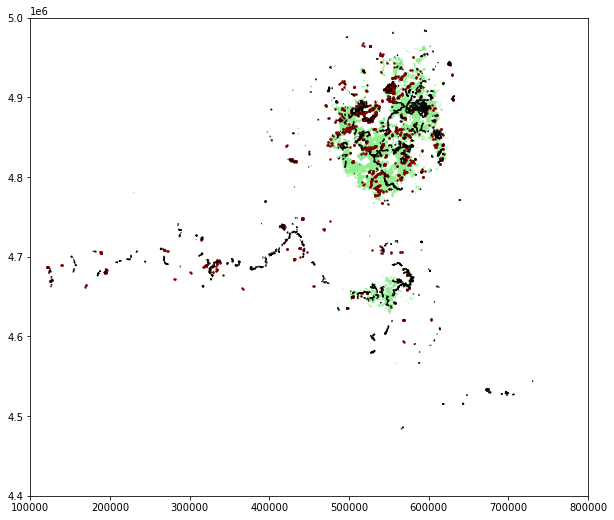

In [66]:
# Define a base map with county boundaries
ax = counties.plot(figsize=(10,10), color='none', edgecolor='gainsboro', zorder=3)

# Add wild lands, campsites, and foot trails to the base map
wild_lands.plot(color='lightgreen', ax=ax)
campsites.plot(color='maroon', markersize=2, ax=ax)
trails.plot(color='black', markersize=1, ax=ax)

plt.xlim([100000, 800000]) 
plt.ylim([4400000, 5000000]) 

# 11.1.2. EXERCICES

In [67]:
import geopandas as gpd

# Get the data

In [75]:
loans_filepath = "geospatial-learn-course-data/input/kiva_loans/kiva_loans.shp"

# Your code here: Load the data
world_loans = gpd.read_file(loans_filepath)

# Uncomment to view the first five rows of the data
world_loans.head()

,Partner ID,Field Part,sector,Loan Theme,country,amount,geometry
0,9,KREDIT Microfinance Institution,General Financial Inclusion,Higher Education,Cambodia,450,POINT (102.89751 13.66726)
1,9,KREDIT Microfinance Institution,General Financial Inclusion,Vulnerable Populations,Cambodia,20275,POINT (102.98962 13.02870)
2,9,KREDIT Microfinance Institution,General Financial Inclusion,Higher Education,Cambodia,9150,POINT (102.98962 13.02870)
3,9,KREDIT Microfinance Institution,General Financial Inclusion,Vulnerable Populations,Cambodia,604950,POINT (105.31312 12.09829)
4,9,KREDIT Microfinance Institution,General Financial Inclusion,Sanitation,Cambodia,275,POINT (105.31312 12.09829)


# Plot the data

In [76]:
# This dataset is provided in GeoPandas
world_filepath = gpd.datasets.get_path('naturalearth_lowres')
world = gpd.read_file(world_filepath)
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


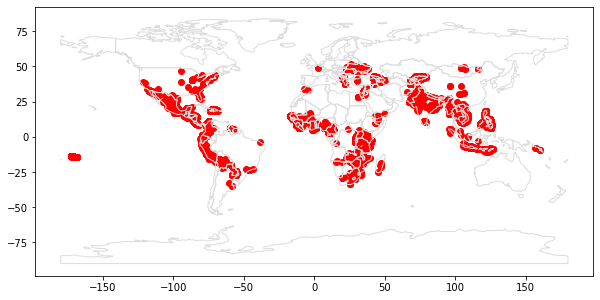

In [78]:
# Define a base map with county boundaries
ax = world.plot(figsize=(10,10), color='none', edgecolor='gainsboro', zorder=3)

# Add wild lands, campsites, and foot trails to the base map
world_loans.plot(color='red', ax=ax)
plt.show()

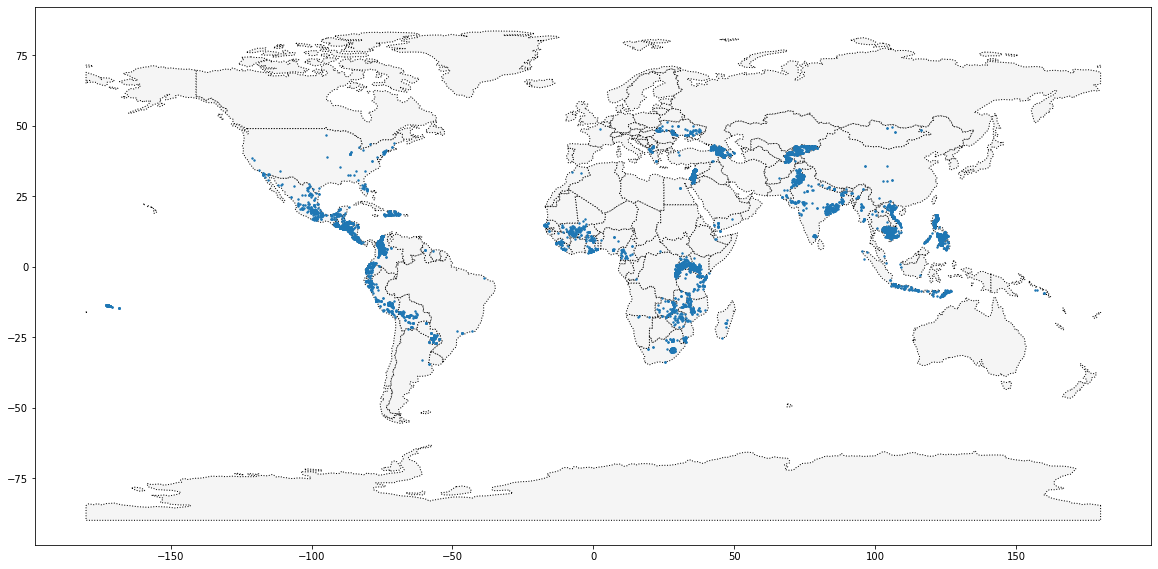

In [80]:
ax = world.plot(figsize=(20,20), color='whitesmoke', linestyle=':', edgecolor='black')
world_loans.plot(ax=ax, markersize=2)
plt.show()

In [81]:
world_loans.head()

,Partner ID,Field Part,sector,Loan Theme,country,amount,geometry
0,9,KREDIT Microfinance Institution,General Financial Inclusion,Higher Education,Cambodia,450,POINT (102.89751 13.66726)
1,9,KREDIT Microfinance Institution,General Financial Inclusion,Vulnerable Populations,Cambodia,20275,POINT (102.98962 13.02870)
2,9,KREDIT Microfinance Institution,General Financial Inclusion,Higher Education,Cambodia,9150,POINT (102.98962 13.02870)
3,9,KREDIT Microfinance Institution,General Financial Inclusion,Vulnerable Populations,Cambodia,604950,POINT (105.31312 12.09829)
4,9,KREDIT Microfinance Institution,General Financial Inclusion,Sanitation,Cambodia,275,POINT (105.31312 12.09829)


# Select loans based in the Philippines

In [83]:
PHL_loans = world_loans.loc[world_loans.country=='Philippines'].copy()
PHL_loans

,Partner ID,Field Part,sector,Loan Theme,country,amount,geometry
2859,123,Alalay sa Kaunlaran (ASKI),General Financial Inclusion,General,Philippines,400,POINT (121.73961 17.64228)
2860,123,Alalay sa Kaunlaran (ASKI),General Financial Inclusion,General,Philippines,400,POINT (121.74169 17.63235)
2861,123,Alalay sa Kaunlaran (ASKI),General Financial Inclusion,General,Philippines,400,POINT (121.46667 16.60000)
2862,123,Alalay sa Kaunlaran (ASKI),General Financial Inclusion,General,Philippines,6050,POINT (121.73333 17.83333)
2863,123,Alalay sa Kaunlaran (ASKI),General Financial Inclusion,General,Philippines,625,POINT (121.51800 16.72368)
...,...,...,...,...,...,...,...
12376,389,SEED Center Philippines,General Financial Inclusion,Small Enterprise,Philippines,11500,POINT (120.83841 14.35197)
12377,389,SEED Center Philippines,General Financial Inclusion,General,Philippines,17050,POINT (120.83841 14.35197)
12378,389,SEED Center Philippines,General Financial Inclusion,Small Enterprise,Philippines,24000,POINT (120.96597 14.62057)
12379,389,SEED Center Philippines,General Financial Inclusion,General,Philippines,31725,POINT (120.96597 14.62057)


# Understand loans in the Philippines

In [84]:
# Load a KML file containing island boundaries
gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'
PHL = gpd.read_file("geospatial-learn-course-data/input/Philippines_AL258.kml", driver='KML')
PHL.head()

,Name,Description,geometry
0,Autonomous Region in Muslim Mindanao,,"MULTIPOLYGON (((119.46690 4.58718, 119.46653 4..."
1,Bicol Region,,"MULTIPOLYGON (((124.04577 11.57862, 124.04594 ..."
2,Cagayan Valley,,"MULTIPOLYGON (((122.51581 17.04436, 122.51568 ..."
3,Calabarzon,,"MULTIPOLYGON (((120.49202 14.05403, 120.49201 ..."
4,Caraga,,"MULTIPOLYGON (((126.45401 8.24400, 126.45407 8..."


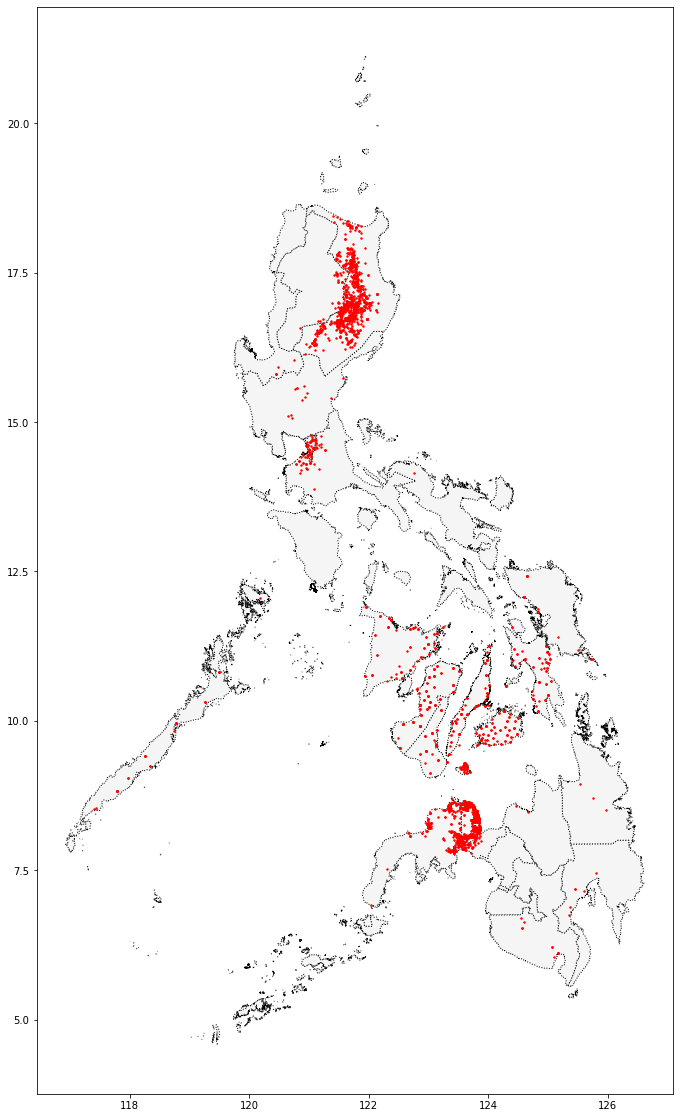

In [87]:
ax1 = PHL.plot(figsize=(20,20), color='whitesmoke', linestyle=':', edgecolor='black')
PHL_loans.plot(ax=ax1, color='red', markersize=2)
plt.show()

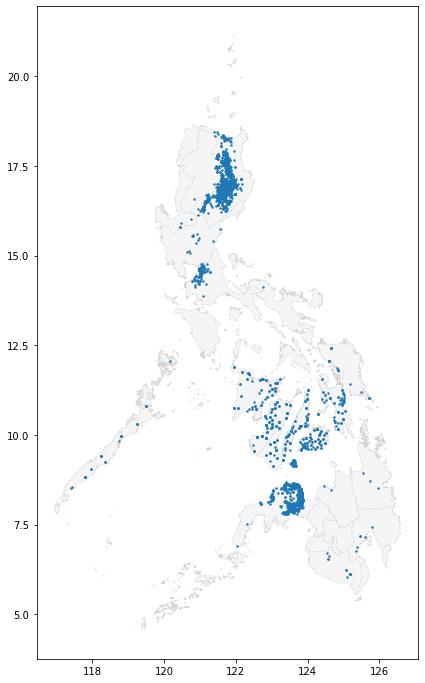

In [89]:
ax = PHL.plot(figsize=(12,12), color='whitesmoke', linestyle=':', edgecolor='lightgray')
PHL_loans.plot(ax=ax, markersize=2)
plt.show()